In [2]:
# reloading for modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# ignore some unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import the needed modules
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

In [187]:
def k_clique_communities(G, k=3):
    # NOTE: a couple of stages could be combined 
    #       but was left as is for ease of understanding
    
    # 1: find all maximal cliques
    cliques = list(nx.find_cliques(G))

    # 2: create clique overlap matrix
    num_of_cliques = len(cliques)
    matrix = np.zeros((num_of_cliques,num_of_cliques))
    for i in range(0,num_of_cliques):
        for j in range(0,num_of_cliques):
            for v in cliques[i]:
                if v in cliques[j]:
                    matrix[i,j] += 1
    
    # 3: threshold matrix with k
    for i in range(0,num_of_cliques):
        for j in range(0,num_of_cliques):
            if (matrix[i,j] < k-1) or (i == j and matrix[i,j] < k):
                matrix[i,j] = 0
            else:
                matrix[i,j] = 1
    
    # 4: combine connected components, generate communities
    communities = list()
    G_hier = nx.Graph()
    for i in range(0,num_of_cliques):
        for j in range(0,i+1):
            if matrix[i,j] == 1:
                G_hier.add_edge(i,j)
    for comm_idx in nx.connected_components(G_hier):
        comm = set()
        for v in comm_idx:
            comm |= set(cliques[v])
        communities.append(comm)
    
    return communities

Implementation is correct.


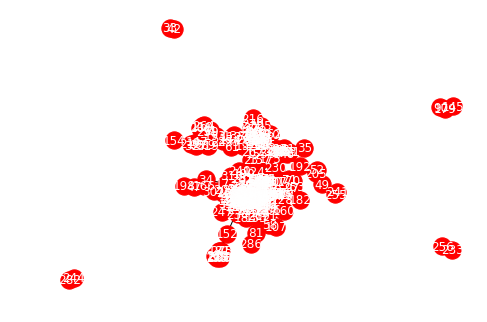

In [201]:
from networkx.algorithms.community import k_clique_communities as nx_k_clique_communities

# Graph G
G = nx.read_edgelist("communities.txt")

# our algorithm implementation
user_comm = k_clique_communities(G,3)
# networkx implementation for validation
nx_comm = list(nx_k_clique_communities(G,3))

# verify the correctness
is_ok = True
for s in user_comm:
    if s not in nx_comm:
        is_ok = False
for s in nx_comm:
    if s not in user_comm:
        is_ok = False
if not is_ok:
    print("A difference exists.")
else:
    print("Implementation is correct.")